# Embryo LCB consensus peaks 12k downsampling

In [1]:
import pycisTopic
import os
import pickle
pycisTopic.__version__

'2.0a0'

In [2]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
out_dir = "/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/12k_dechor_HyDrop_10x_otsu/"
#os.makedirs(out_dir, exist_ok = True)

# make cistopic obj

use code in make_cistopic_obj_from_PUMATAC_otsu.py to make cistopic objs from PUMATAC output (all samples need to be processed together)

In [4]:
#import all cistopic obj and merge them into one

In [16]:
directory = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/12k_dechor_HyDrop_10x_otsu/cistopic_objs_downsampled'

# List all .pkl files in the directory
pkl_files = [f for f in os.listdir(directory) if f.endswith('cto.pkl')]

# Load all .pkl files using pickle
cistopic_obj_list = []
for filename in pkl_files:
    filepath = os.path.join(directory, filename)
    with open(filepath, 'rb') as file:
        cistopic_obj = pickle.load(file)
        cistopic_obj_list.append(cistopic_obj)

In [18]:
from pycisTopic.cistopic_class import *

In [ ]:
cistopic_obj = merge(cistopic_obj_list)

In [66]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 490404 × 95819


In [67]:
sample_counts = cistopic_obj.cell_data['sample_id'].value_counts().to_dict()
print(sample_counts)

{'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1.DOWNSAMPLED12000RPC': 75122, 'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2.DOWNSAMPLED12000RPC': 71234, 'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8.DOWNSAMPLED12000RPC': 66425, 'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5.DOWNSAMPLED12000RPC': 39642, 'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6.DOWNSAMPLED12000RPC': 37439, 'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3.DOWNSAMPLED12000RPC': 21917, 'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6.DOWNSAMPLED12000RPC': 20800, 'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1.DOWNSAMPLED12000RPC': 20161, 'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4.DOWNSAMPLED12000RPC': 17463, 'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1.DOWNSAMPLED12000RPC': 

In [68]:
cistopic_obj.cell_data

cisTopic_log_nr_frag  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...             2.998695   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...             2.912222   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...             3.560504   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...             4.209461   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...             3.443419   
...                                                                 ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...             2.673021   
AGCATGGAACTCCACTTGTCGGATTGTTCT___FDM__01cd58__2...             2.689309   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...             2.790988   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...             2.741152   
AAGCAGATAGCGCTATTGTAGTGCTTCGAC___FDM__01cd58__2...             2.846955   

                                                   cisTopic_nr_frag  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...              997   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...              817   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...             3635   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...            16198   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...             2776   
...                                                             ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...              471   
AGCATGGAACTCCACTTGTCGGATTGTTCT___FDM__01cd58__2...              489   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...              618   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...              551   
AAGCAGATAGCGCTATTGTAGTGCTTCGAC___FDM__01cd58__2...              703   

                                                   cisTopic_log_nr_acc  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...            2.973128   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...            2.900367   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...            3.500922   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...            4.136403   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...            3.387212   
...                                                                ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...            2.660865   
AGCATGGAACTCCACTTGTCGGATTGTTCT___FDM__01cd58__2...            2.678518   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...            2.779596   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...            2.720986   
AAGCAGATAGCGCTATTGTAGTGCTTCGAC___FDM__01cd58__2...            2.833147   

                                                   cisTopic_nr_acc  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...             940   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...             795   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...            3169   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...           13690   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...            2439   
...                                                            ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...             458   
AGCATGGAACTCCACTTGTCGGATTGTTCT___FDM__01cd58__2...             477   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...             602   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...             526   
AAGCAGATAGCGCTATTGTAGTGCTTCGAC___FDM__01cd58__2...             681   

                                                    Log_total_nr_frag  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...           3.567497   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...           3.399847   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...           4.043402   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...           4.659878   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...           4.184947   
...                                                               ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...      

In [69]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_objs/cistopic_obj_12k_embryo_all_LCB_embryo_dechor_consensusupeaks_20082024.pkl"), "wb")
)

## annot

In [71]:
tech_dict = {'FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3': 'HyDrop_v2', 
        'FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo': '10x_v2', 
        'FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1': 'HyDrop_v2', 
        'FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4': 'HyDrop_v2', 
        'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1': '10x_v2', 
        'FDM__15d2ea__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS5': 'HyDrop_v2', 
        'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5': 'HyDrop_v2', 
        'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8': '10x_v2', 
        'FDM__a436c1__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV3': 'HyDrop_v2', 
        'FDM__440342__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS7': '10x_v2', 
        'FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2': 'HyDrop_v2', 
        'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1': 'HyDrop_v2', 
        'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2': '10x_v2', 
        'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4': 'HyDrop_v2', 
        'FDM__4ae8ee__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS4': 'HyDrop_v2', 
        'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6': 'HyDrop_v2', 
        'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6': 'HyDrop_v2', 
        'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1': 'HyDrop_v2', 
        'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3': 'HyDrop_v2', 
        'FDM__af277c__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X2': 'HyDrop_v2', 
        'FDM__48e432__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS3': 'HyDrop_v2', 
        'FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS2': 'HyDrop_v2', 
        'FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4': 'HyDrop_v2'}

In [72]:
for sample_id, new_value in tech_dict.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == sample_id, "tech"] = new_value

In [73]:
tech_dict_details = {'FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3': 'HyDrop_v2_dechor', 
        'FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo': '10x_v2_Onyx', 
        'FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1': 'HyDrop_v2_dechor', 
        'FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4': 'HyDrop_v2', 
        'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1': '10x_v2_Chromium_dechor', 
        'FDM__15d2ea__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS5': 'HyDrop_v2', 
        'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5': 'HyDrop_v2_dechor_highTn5', 
        'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8': '10x_v2_HyDrop_reagents', 
        'FDM__a436c1__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV3': 'HyDrop_v2', 
        'FDM__440342__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS7': '10x_v2_HyDrop_reagents', 
        'FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2': 'HyDrop_v2', 
        'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1': 'HyDrop_v2', 
        'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2': '10x_v2_Chromium_dechor', 
        'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4': 'HyDrop_v2_dechor_highTn5', 
        'FDM__4ae8ee__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS4': 'HyDrop_v2', 
        'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6': 'HyDrop_v2', 
        'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6': 'HyDrop_v2_dechor_highTn5', 
        'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1': 'HyDrop_v2', 
        'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3': 'HyDrop_v2_dechor_highTn5', 
        'FDM__af277c__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X2': 'HyDrop_v2_dechor', 
        'FDM__48e432__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS3': 'HyDrop_v2', 
        'FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS2': 'HyDrop_v2', 
        'FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4': 'HyDrop_v2_dechor'}

In [74]:
for sample_id, new_value in tech_dict_details.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == sample_id, "tech_details"] = new_value

In [26]:
cistopic_obj.cell_data

cisTopic_log_nr_frag  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...             2.998695   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...             2.912222   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...             3.560504   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...             4.209461   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...             3.443419   
...                                                                 ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...             2.673021   
AGCATGGAACTCCACTTGTCGGATTGTTCT___FDM__01cd58__2...             2.689309   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...             2.790988   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...             2.741152   
AAGCAGATAGCGCTATTGTAGTGCTTCGAC___FDM__01cd58__2...             2.846955   

                                                   cisTopic_nr_frag  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...              997   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...              817   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...             3635   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...            16198   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...             2776   
...                                                             ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...              471   
AGCATGGAACTCCACTTGTCGGATTGTTCT___FDM__01cd58__2...              489   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...              618   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...              551   
AAGCAGATAGCGCTATTGTAGTGCTTCGAC___FDM__01cd58__2...              703   

                                                   cisTopic_log_nr_acc  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...            2.973128   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...            2.900367   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...            3.500922   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...            4.136403   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...            3.387212   
...                                                                ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...            2.660865   
AGCATGGAACTCCACTTGTCGGATTGTTCT___FDM__01cd58__2...            2.678518   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...            2.779596   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...            2.720986   
AAGCAGATAGCGCTATTGTAGTGCTTCGAC___FDM__01cd58__2...            2.833147   

                                                   cisTopic_nr_acc  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...             940   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...             795   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...            3169   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...           13690   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...            2439   
...                                                            ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...             458   
AGCATGGAACTCCACTTGTCGGATTGTTCT___FDM__01cd58__2...             477   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...             602   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...             526   
AAGCAGATAGCGCTATTGTAGTGCTTCGAC___FDM__01cd58__2...             681   

                                                    Log_total_nr_frag  \
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...           3.567497   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...           3.399847   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...           4.043402   
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__2...           4.659878   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...           4.184947   
...                                                               ...   
ACGGTGCTTGTTCGCTATGTTGAATCCAAG___FDM__01cd58__2...      

In [80]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_objs/cistopic_obj_12k_embryo_all_LCB_embryo_dechor_consensusupeaks_20082024.pkl"), "wb")
)

In [28]:
#simple counting
sample_counts = cistopic_obj.cell_data['tech'].value_counts().to_dict()
print(sample_counts)

{'HyDrop_v2': 268981, '10x_v2': 221423}


In [29]:
#simple counting
sample_counts = cistopic_obj.cell_data['tech_details'].value_counts().to_dict()
print(sample_counts)

{'10x_v2_Chromium_dechor': 146356, 'HyDrop_v2_dechor_highTn5': 116461, 'HyDrop_v2': 107109, '10x_v2_HyDrop_reagents': 66425, 'HyDrop_v2_dechor': 45411, '10x_v2_Onyx': 8642}


In [30]:
#simple counting
sample_counts = cistopic_obj.cell_data['sample_id'].value_counts().to_dict()
print(sample_counts)

{'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1': 75122, 'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2': 71234, 'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8': 66425, 'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5': 39642, 'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6': 37439, 'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3': 21917, 'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6': 20800, 'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1': 20161, 'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4': 17463, 'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1': 17314, 'FDM__15d2ea__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS5': 14807, 'FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2': 14425, 'FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP

# count

In [35]:
cistopic_obj.cell_data.columns

Index(['barcode', 'Total_nr_frag_in_regions', 'Dupl_rate', 'cisTopic_nr_frag',
       'Total_nr_frag', 'pycisTopic_leiden_10_0.6', 'sample_id',
       'Log_total_nr_frag', 'FRIP',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'cisTopic_log_nr_acc', 'Log_unique_nr_frag', 'Unique_nr_frag',
       'TSS_enrichment', 'kde__log_Unique_nr_frag_in_regions__FRIP',
       'cisTopic_nr_acc', 'cisTopic_log_nr_frag',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'Dupl_nr_frag',
       'Unique_nr_frag_in_regions', 'annotations_big_embryo_atlas_20062024',
       'annotations_big_embryo_atlas_12082024',
       'annotations_big_embryo_atlas_13082024', 'tech_details', 'tech',
       'dechor'],
      dtype='object')

In [38]:
cistopic_obj.cell_data

barcode  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...                TACTGTTTGTTTCTTG   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...                CATTGGCCTCGACTAT   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...                ATTACCTACAACGTTC   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...                CTGTTGCACTACAGCT   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...                GAAGTTCTGTCATTTC   
...                                                                            ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...  ACAGAGATGGGCTCATCACTCAGTCGTCCT   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...  ATGATAGGAGATACCAGAAGCCGAATGACT   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...  CAATCCTCGTTCTGACACTAACGTATAACG   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...  GATTAGGCGTGGTTGACCTATCTGGAAGCC   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...  AATAGATCCTGGTCTCAAGTTAATCGCACA   

                                                    Total_nr_frag_in_regions  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...                      6611   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...                      5518   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...                     11585   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...                      4298   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...                      2202   
...                                                                      ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...                       899   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...                       797   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...                       826   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...                      1105   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...                       997   

                                                    Dupl_rate  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...   0.322308   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...   0.341250   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...   0.279603   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...   0.281989   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...   0.235249   
...                                                       ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...   0.110656   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...   0.066220   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...   0.142684   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...   0.247391   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...   0.213707   

                                                   cisTopic_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...             5442   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...             4556   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...            10742   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...             4991   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...             2281   
...                                                             ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...              850   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...              904   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...             1030   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...             1734   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...              811   

                                                    Total_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...          11247   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...           8926   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...          17836   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...           8628   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...           3932   
...                              

In [47]:
cluster_avg = cistopic_obj.cell_data.groupby('tech')['Unique_nr_frag'].mean()
sorted_clusters = cluster_avg.sort_values()
table = sorted_clusters.reset_index()
table.columns = ['tech', 'Unique_nr_frag']
print(table)

        tech  Unique_nr_frag
0  HyDrop_v2     5232.270102
1     10x_v2     6146.087041


In [48]:
cluster_avg = cistopic_obj.cell_data.groupby('tech')['FRIP'].mean()
sorted_clusters = cluster_avg.sort_values()
table = sorted_clusters.reset_index()
table.columns = ['tech', 'FRIP']
print(table)

        tech      FRIP
0  HyDrop_v2  0.554489
1     10x_v2  0.591296


In [49]:
cluster_avg = cistopic_obj.cell_data.groupby('tech')['TSS_enrichment'].mean()
sorted_clusters = cluster_avg.sort_values()
table = sorted_clusters.reset_index()
table.columns = ['tech', 'TSS_enrichment']
print(table)

        tech  TSS_enrichment
0     10x_v2        3.808193
1  HyDrop_v2        4.295127


# topic modeling - continue here

In [4]:
import pickle
infile = open(out_dir + 'cistopic_objs/cistopic_obj_12k_embryo_dechor_LCB_embryo_dechor_consensusupeaks_20082024.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [5]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 308228 × 95819


In [11]:
model_folder = out_dir +"cistopic_objs/models/"
models = [
   pickle.load(open(os.path.join(model_folder, model_fname), "rb"))
   for model_fname in os.listdir(model_folder)]

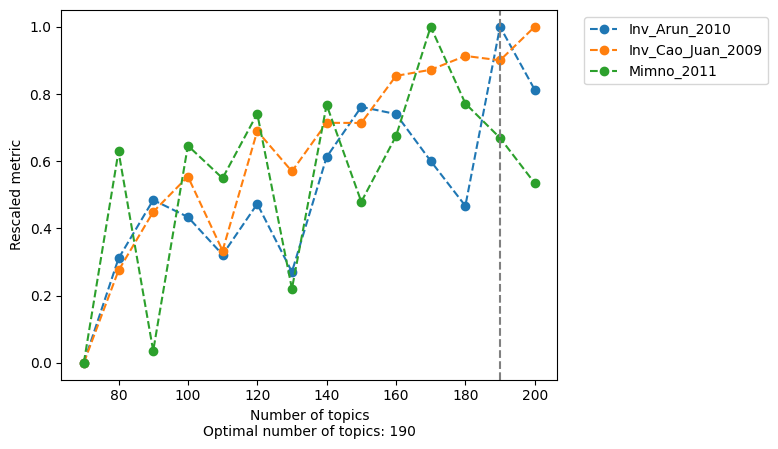

In [12]:
#finished early due to time out but still to check if it is split again
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
    metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011'],
    select_model = None,
    return_model = True
)

In [13]:
cistopic_obj.add_LDA_model(model)

In [14]:
find_clusters(
    cistopic_obj,
    target  = 'cell',
    k = 10,
    res = [0.6],
    prefix = 'pycisTopic_',
    scale = True,
    split_pattern = '-'
)

2024-08-30 06:47:48,540 cisTopic     INFO     Finding neighbours


In [15]:
run_umap(
    cistopic_obj,
    target  = 'cell', scale=True)

2024-08-30 06:50:46,710 cisTopic     INFO     Running UMAP


/opt/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [16]:
run_tsne(
    cistopic_obj,
    target  = 'cell', scale=True)

2024-08-30 06:56:15,250 cisTopic     INFO     Running TSNE


In [17]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_objs/cistopic_obj_12k_embryo_dechor_LCB_embryo_dechor_consensusupeaks_20082024_190topics.pkl"), "wb")
)

In [18]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 308228 × 95819


In [21]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 490404 × 95819


### visualization

In [63]:
#after models - models are submitted
# Load cisTopic object
import pickle
infile = open(out_dir + 'cistopic_objs/cistopic_obj_12k_embryo_dechor_LCB_embryo_dechor_consensusupeaks_20082024_190topics.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [19]:
print(cistopic_obj.cell_data.columns)

Index(['cisTopic_log_nr_frag', 'cisTopic_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_nr_acc', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'kde__log_Unique_nr_frag_in_regions__FRIP',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'barcode', 'tech',
       'tech_details', 'dechor', 'pycisTopic_leiden_10_0.6'],
      dtype='object')


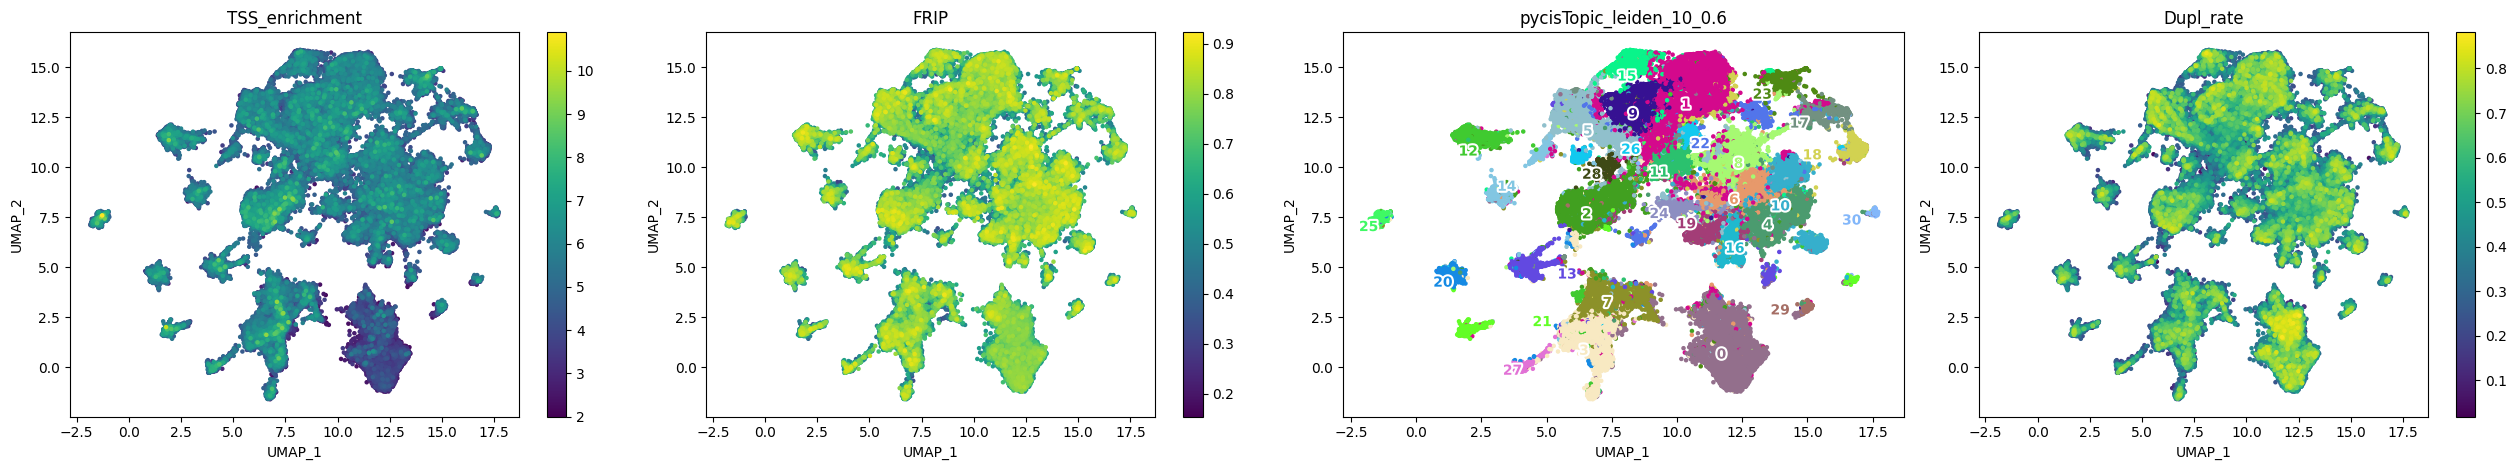

In [20]:
# model 190
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['TSS_enrichment', 'FRIP', 'pycisTopic_leiden_10_0.6', 'Dupl_rate'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

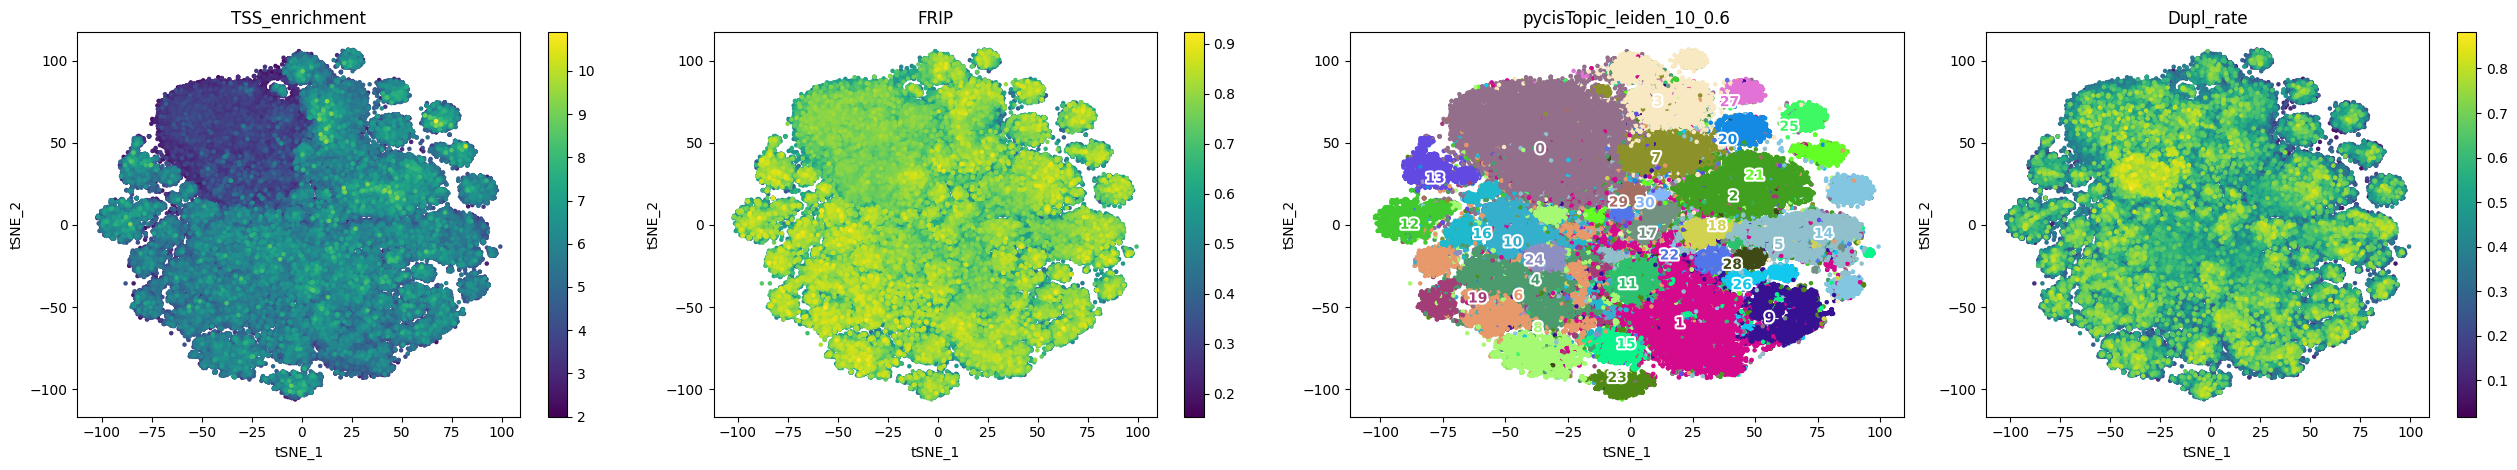

In [21]:
# model 190
plot_metadata(
    cistopic_obj,
    reduction_name='tSNE',
    variables=['TSS_enrichment', 'FRIP', 'pycisTopic_leiden_10_0.6', 'Dupl_rate'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

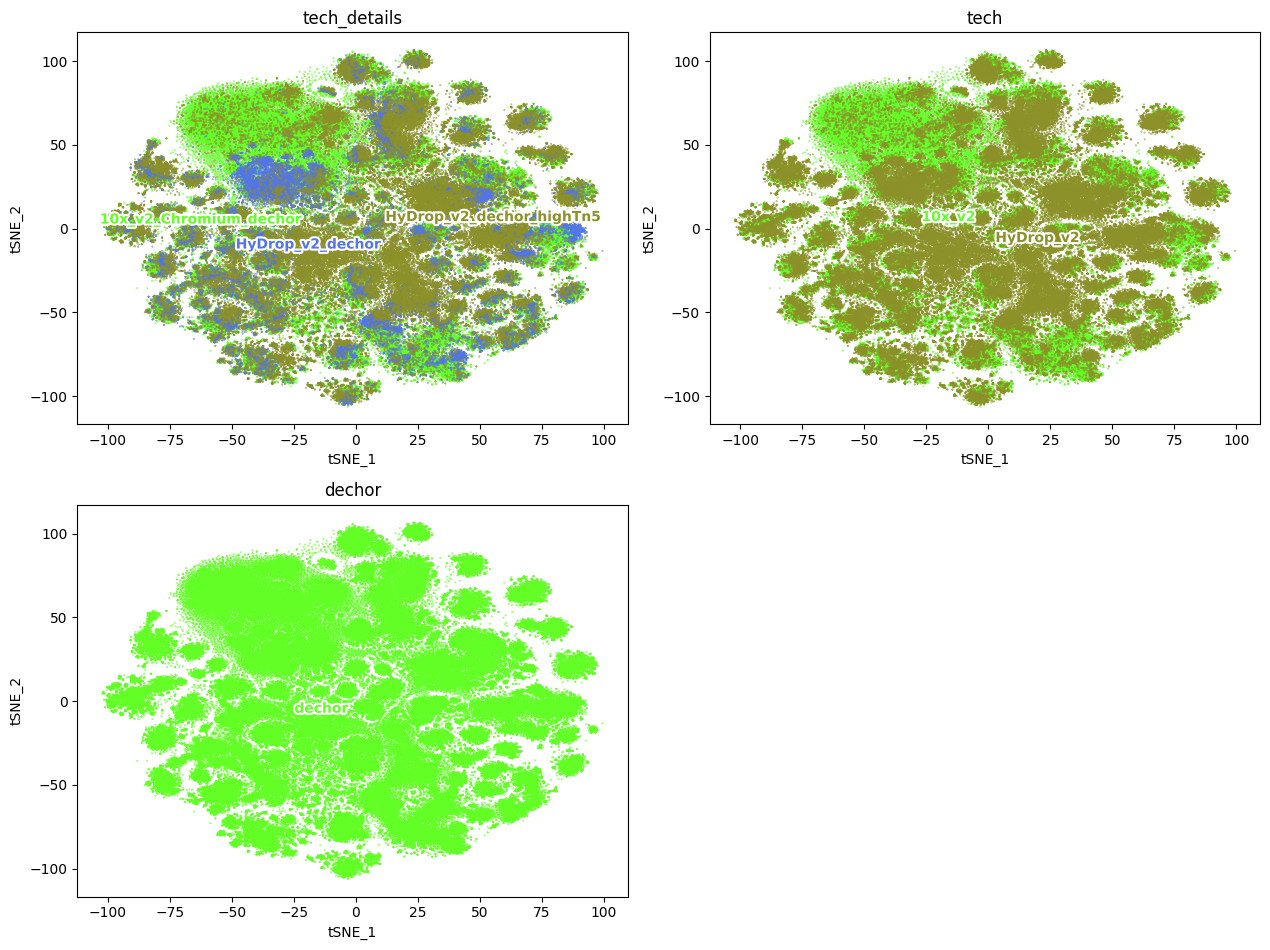

In [22]:
# model 190
plot_metadata(
    cistopic_obj,
    reduction_name='tSNE',
    variables=['tech_details', 'tech', 'dechor'],
    target='cell', num_columns=2,
    text_size=10,
    dot_size=0.1)

In [39]:
tech_dict = {'FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3': 'HyDrop_v2', 
        'FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo': '10x_v2', 
        'FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1': 'HyDrop_v2', 
        'FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4': 'HyDrop_v2', 
        'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1': '10x_v2', 
        'FDM__15d2ea__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS5': 'HyDrop_v2', 
        'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5': 'HyDrop_v2', 
        'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8': '10x_v2', 
        'FDM__a436c1__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV3': 'HyDrop_v2', 
        'FDM__440342__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS7': '10x_v2', 
        'FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2': 'HyDrop_v2', 
        'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1': 'HyDrop_v2', 
        'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2': '10x_v2', 
        'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4': 'HyDrop_v2', 
        'FDM__4ae8ee__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS4': 'HyDrop_v2', 
        'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6': 'HyDrop_v2', 
        'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6': 'HyDrop_v2', 
        'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1': 'HyDrop_v2', 
        'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3': 'HyDrop_v2', 
        'FDM__af277c__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X2': 'HyDrop_v2', 
        'FDM__48e432__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS3': 'HyDrop_v2', 
        'FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS2': 'HyDrop_v2', 
        'FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4': 'HyDrop_v2'}

In [40]:
for sample_id, new_value in tech_dict.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == sample_id, "tech"] = new_value

In [41]:
tech_dict_details = {'FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3': 'HyDrop_v2_dechor', 
        'FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo': '10x_v2_Onyx', 
        'FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1': 'HyDrop_v2_dechor', 
        'FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4': 'HyDrop_v2', 
        'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1': '10x_v2_Chromium_dechor', 
        'FDM__15d2ea__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS5': 'HyDrop_v2', 
        'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5': 'HyDrop_v2_dechor_highTn5', 
        'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8': '10x_v2_HyDrop_reagents', 
        'FDM__a436c1__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV3': 'HyDrop_v2', 
        'FDM__440342__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS7': '10x_v2_HyDrop_reagents', 
        'FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2': 'HyDrop_v2', 
        'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1': 'HyDrop_v2', 
        'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2': '10x_v2_Chromium_dechor', 
        'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4': 'HyDrop_v2_dechor_highTn5', 
        'FDM__4ae8ee__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS4': 'HyDrop_v2', 
        'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6': 'HyDrop_v2', 
        'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6': 'HyDrop_v2_dechor_highTn5', 
        'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1': 'HyDrop_v2', 
        'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3': 'HyDrop_v2_dechor_highTn5', 
        'FDM__af277c__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X2': 'HyDrop_v2_dechor', 
        'FDM__48e432__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS3': 'HyDrop_v2', 
        'FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS2': 'HyDrop_v2', 
        'FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4': 'HyDrop_v2_dechor'}

In [42]:
for sample_id, new_value in tech_dict_details.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == sample_id, "tech_details"] = new_value

In [43]:
dechor = {'FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3': 'dechor', 
        'FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo': 'non_dechor', 
        'FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1': 'dechor', 
        'FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4': 'non_dechor', 
        'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1': 'dechor', 
        'FDM__15d2ea__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS5': 'non_dechor', 
        'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5': 'dechor', 
        'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8': 'non_dechor', 
        'FDM__a436c1__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV3': 'non_dechor', 
        'FDM__440342__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS7': 'non_dechor', 
        'FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2': 'non_dechor', 
        'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1': 'non_dechor', 
        'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2': 'dechor', 
        'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4': 'dechor', 
        'FDM__4ae8ee__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS4': 'non_dechor', 
        'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6': 'non_dechor', 
        'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6': 'dechor', 
        'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1': 'non_dechor', 
        'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3': 'dechor', 
        'FDM__af277c__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X2': 'dechor', 
        'FDM__48e432__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS3': 'non_dechor', 
        'FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS2': 'non_dechor', 
        'FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4': 'dechor'}

In [44]:
for sample_id, new_value in dechor.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == sample_id, "dechor"] = new_value

In [45]:
cistopic_obj.cell_data

barcode  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...                TACTGTTTGTTTCTTG   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...                CATTGGCCTCGACTAT   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...                ATTACCTACAACGTTC   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...                CTGTTGCACTACAGCT   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...                GAAGTTCTGTCATTTC   
...                                                                            ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...  ACAGAGATGGGCTCATCACTCAGTCGTCCT   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...  ATGATAGGAGATACCAGAAGCCGAATGACT   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...  CAATCCTCGTTCTGACACTAACGTATAACG   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...  GATTAGGCGTGGTTGACCTATCTGGAAGCC   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...  AATAGATCCTGGTCTCAAGTTAATCGCACA   

                                                    Total_nr_frag_in_regions  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...                      6611   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...                      5518   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...                     11585   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...                      4298   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...                      2202   
...                                                                      ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...                       899   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...                       797   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...                       826   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...                      1105   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...                       997   

                                                    Dupl_rate  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...   0.322308   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...   0.341250   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...   0.279603   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...   0.281989   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...   0.235249   
...                                                       ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...   0.110656   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...   0.066220   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...   0.142684   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...   0.247391   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...   0.213707   

                                                   cisTopic_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...             5442   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...             4556   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...            10742   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...             4991   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...             2281   
...                                                             ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...              850   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...              904   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...             1030   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...             1734   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...              811   

                                                    Total_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...          11247   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...           8926   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...          17836   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...           8628   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...           3932   
...                              

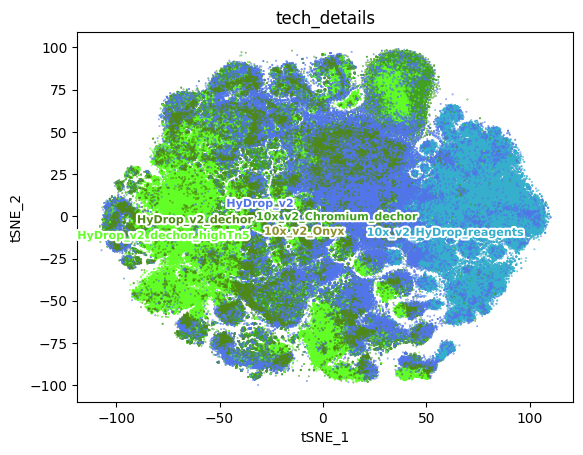

In [15]:
# model 120
plot_metadata(
    cistopic_obj,
    reduction_name='tSNE',
    variables=['tech_details'],
    target='cell', num_columns=1,
    text_size=8,
    dot_size=0.1)

In [16]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_consensusupeaks_05082024_120topics.pkl"), "wb")
)

# harmony on tech details

In [23]:
#on 190 topics
from pycisTopic.clust_vis import *
harmony(cistopic_obj, 'tech_details', random_state=555)

2024-08-30 07:21:38,428 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


2024-08-30 07:21:38,428 harmonypy    INFO     Computing initial centroids with sklearn.KMeans...


2024-08-30 07:22:17,067 - harmonypy - INFO - sklearn.KMeans initialization complete.


2024-08-30 07:22:17,067 harmonypy    INFO     sklearn.KMeans initialization complete.


2024-08-30 07:22:18,148 - harmonypy - INFO - Iteration 1 of 10


2024-08-30 07:22:18,148 harmonypy    INFO     Iteration 1 of 10


2024-08-30 07:23:41,534 - harmonypy - INFO - Iteration 2 of 10


2024-08-30 07:23:41,534 harmonypy    INFO     Iteration 2 of 10


2024-08-30 07:24:36,192 - harmonypy - INFO - Converged after 2 iterations


2024-08-30 07:24:36,192 harmonypy    INFO     Converged after 2 iterations


In [24]:
run_umap(cistopic_obj, reduction_name='harmony_tech_details_UMAP',
                target  = 'cell', harmony=True)
run_tsne(cistopic_obj, reduction_name='harmony_tech_details_tSNE',
                 target  = 'cell', harmony=True)

2024-08-30 07:24:36,233 cisTopic     INFO     Running UMAP


/opt/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


2024-08-30 07:30:02,059 cisTopic     INFO     Running TSNE


In [86]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_objs/cistopic_obj_12k_embryo_dechor_LCB_embryo_dechor_consensusupeaks_20082024_190topics.pkl"), "wb")
)

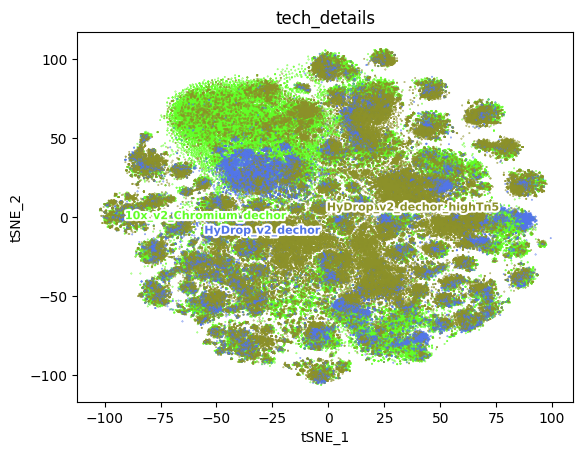

In [26]:
# model 190
plot_metadata(
    cistopic_obj,
    reduction_name='tSNE',
    variables=['tech_details'],
    target='cell', num_columns=1,
    text_size=8,
    dot_size=0.1)

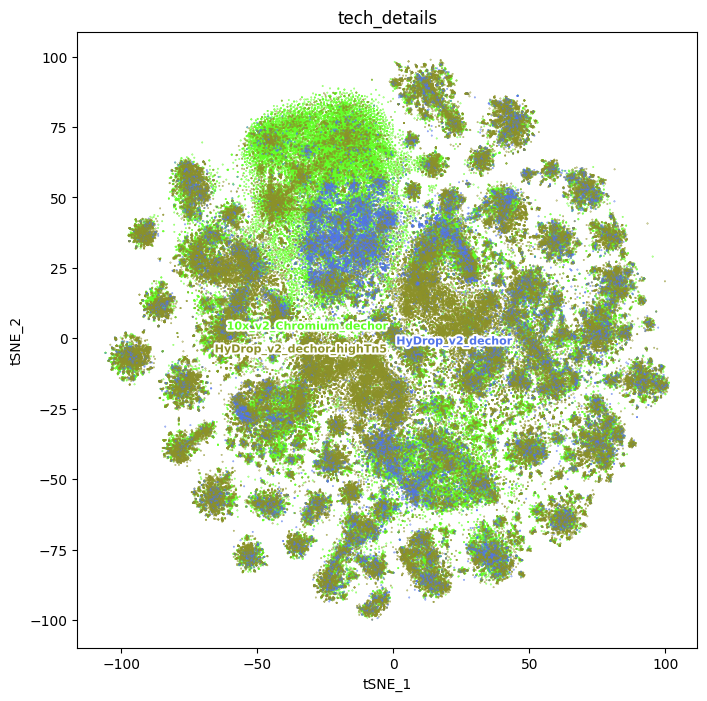

In [27]:
# model 190
plot_metadata(
    cistopic_obj,
    reduction_name='harmony_tech_details_tSNE',
    variables=['tech_details'],
    target='cell', num_columns=1,
    figsize = (8,8),
    text_size=8,
    dot_size=0.1)

In [53]:
cistopic_obj.cell_data

cisTopic_log_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...             3.735759   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...             3.658584   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...             4.031085   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...             3.698188   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...             3.358125   
...                                                                 ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...             2.929419   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...             2.956168   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...             3.012837   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...             3.239049   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...             2.909021   

                                                   cisTopic_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...             5442   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...             4556   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...            10742   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...             4991   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...             2281   
...                                                             ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...              850   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...              904   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...             1030   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...             1734   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...              811   

                                                   cisTopic_log_nr_acc  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...            3.681964   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...            3.586812   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...            3.916559   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...            3.597366   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...            3.319522   
...                                                                ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...            2.917506   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...            2.947924   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...            3.003461   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...            3.211921   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...            2.899821   

                                                   cisTopic_nr_acc  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...            4808   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...            3862   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...            8252   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...            3957   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...            2087   
...                                                            ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...             827   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...             887   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...            1008   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...            1629   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...             794   

                                                    Log_total_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...           4.051037   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...           3.950657   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...           4.251297   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...           3.935910   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...           3.594614   
...                                                               ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...      

# annotate

In [74]:
import pickle
infile = open('/staging/leuven/stg_00002/lcb/hdickm/resources/annotations/matrix_barcodes_embryo_LCB_dechor_atlas_annot_15082024.pkl', 'rb')
matrix = pickle.load(infile)
infile.close()

In [75]:
matrix

annotations_big_embryo_atlas_20062024  \
CTCGATATCTGCTCGTTCATGATCTAGGTA___FDM__0a2768__2...                                Neural   
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...                                   VNC   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...                                   NaN   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...                        Proventriculus   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...                                   VNC   
...                                                                                  ...   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...                   Midgut_late_trypsin   
TCTTGGAATGCTGATTATGTGGACTATACT___FDM__01cd58__2...                             Epidermis   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...                   Midgut_late_trypsin   
TCAACGTCACCACCGTTCTTTCGGAGTGAC___FDM__01cd58__2...                                  Glia   
TATAGTCACCCAGCACATAGTTGGCTTGAC___FDM__01cd58__2...                        Somatic_muscle   

                                                   annotations_big_embryo_atlas_12082024  \
CTCGATATCTGCTCGTTCATGATCTAGGTA___FDM__0a2768__2...                              Neural_3   
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...                                 VNC_2   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...                                   NaN   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...                      Proventriculus_2   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...                                 VNC_1   
...                                                                                  ...   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...                 Midgut_late_trypsin_1   
TCTTGGAATGCTGATTATGTGGACTATACT___FDM__01cd58__2...                              Fat_body   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...                 Midgut_late_trypsin_2   
TCAACGTCACCACCGTTCTTTCGGAGTGAC___FDM__01cd58__2...                                Glia_1   
TATAGTCACCCAGCACATAGTTGGCTTGAC___FDM__01cd58__2...                        Somatic_muscle   

                                                             annotations_big_embryo_atlas_13082024  \
CTCGATATCTGCTCGTTCATGATCTAGGTA___FDM__0a2768__2...                             NB_midline_cells_NA   
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...                                           VNC_1   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...                                             NaN   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...                           Proventriculus_2_mesh   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...                                           VNC_1   
...                                                                                            ...   
AATAGATCCTCTCTCTGTATAGCAGGCGTT___FDM__01cd58__2...               Midgut_zetta_kappa_lambda_iotaTry   
TCTTGGAATGCTGATTATGTGGACTATACT___FDM__01cd58__2...                                        Fat_body   
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__2...  Digestive_system_midgut_alpha_betaTry_MalA1_A6   
TCAACGTCACCACCGTTCTTTCGGAGTGAC___FDM__01cd58__2...                                       Glia_main   
TATAGTCACCCAGCACATAGTTGGCTTGAC___FDM__01cd58__2...                                 Somatic_muscles   

                                                                annotations_big_embryo_atlas_15082024  \
CTCGATATCTGCTCGTTCATGATCTAGGTA___FDM__0a2768__2...           NB_midline_cells_Genital_endocrine_cells   
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__2...  neuronal_ttk_olf_neuron_sepcification_dendrite...   
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__2...                                    Tracheal_system   
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__2...                                Proventriculus_mesh   
TCTGATACACGTGCGGTGTATAAGTTGGTT___FDM__0a2768__2...                                         

In [76]:
new_idx = [f"{x.split('___', 1)[0]}___{x.split('___', 1)[1]}.DOWNSAMPLED12000RPC" for x in matrix.index]
matrix.index = new_idx

In [77]:
cistopic_obj.add_cell_data(matrix, split_pattern = '-')


Columns ['annotations_big_embryo_atlas_20062024', 'annotations_big_embryo_atlas_12082024', 'tech', 'dechor', 'annotations_big_embryo_atlas_13082024', 'tech_details'] will be overwritten


In [78]:
print(cistopic_obj.cell_data.columns)

Index(['barcode', 'Total_nr_frag_in_regions', 'Dupl_rate', 'cisTopic_nr_frag',
       'Total_nr_frag', 'pycisTopic_leiden_10_0.6', 'sample_id',
       'Log_total_nr_frag', 'FRIP',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'cisTopic_log_nr_acc', 'Log_unique_nr_frag', 'Unique_nr_frag',
       'TSS_enrichment', 'kde__log_Unique_nr_frag_in_regions__FRIP',
       'cisTopic_nr_acc', 'cisTopic_log_nr_frag',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'Dupl_nr_frag',
       'Unique_nr_frag_in_regions', 'annotations_big_embryo_atlas_20062024',
       'annotations_big_embryo_atlas_12082024',
       'annotations_big_embryo_atlas_13082024',
       'annotations_big_embryo_atlas_15082024', 'tech_details',
       'annotations_big_embryo_atlas_15082024_broad', 'tech', 'dechor'],
      dtype='object')


In [79]:
cistopic_obj.cell_data

barcode  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...                TACTGTTTGTTTCTTG   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...                CATTGGCCTCGACTAT   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...                ATTACCTACAACGTTC   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...                CTGTTGCACTACAGCT   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...                GAAGTTCTGTCATTTC   
...                                                                            ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...  ACAGAGATGGGCTCATCACTCAGTCGTCCT   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...  ATGATAGGAGATACCAGAAGCCGAATGACT   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...  CAATCCTCGTTCTGACACTAACGTATAACG   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...  GATTAGGCGTGGTTGACCTATCTGGAAGCC   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...  AATAGATCCTGGTCTCAAGTTAATCGCACA   

                                                    Total_nr_frag_in_regions  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...                      6611   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...                      5518   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...                     11585   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...                      4298   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...                      2202   
...                                                                      ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...                       899   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...                       797   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...                       826   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...                      1105   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...                       997   

                                                    Dupl_rate  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...   0.322308   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...   0.341250   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...   0.279603   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...   0.281989   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...   0.235249   
...                                                       ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...   0.110656   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...   0.066220   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...   0.142684   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...   0.247391   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...   0.213707   

                                                   cisTopic_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...             5442   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...             4556   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...            10742   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...             4991   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...             2281   
...                                                             ...   
ACAGAGATGGGCTCATCACTCAGTCGTCCT___FDM__0cd23d__2...              850   
ATGATAGGAGATACCAGAAGCCGAATGACT___FDM__0cd23d__2...              904   
CAATCCTCGTTCTGACACTAACGTATAACG___FDM__0cd23d__2...             1030   
GATTAGGCGTGGTTGACCTATCTGGAAGCC___FDM__0cd23d__2...             1734   
AATAGATCCTGGTCTCAAGTTAATCGCACA___FDM__0cd23d__2...              811   

                                                    Total_nr_frag  \
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATA...          11247   
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATA...           8926   
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATA...          17836   
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATA...           8628   
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATA...           3932   
...                              

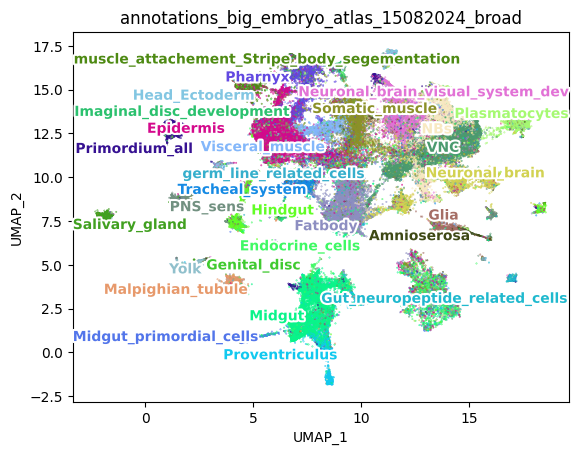

In [80]:
# model 190
plot_metadata(
    cistopic_obj,
    reduction_name='harmony_tech_details_UMAP',
    variables=['annotations_big_embryo_atlas_15082024_broad'],
    target='cell', num_columns=1,
    text_size=10,
    dot_size=0.1)

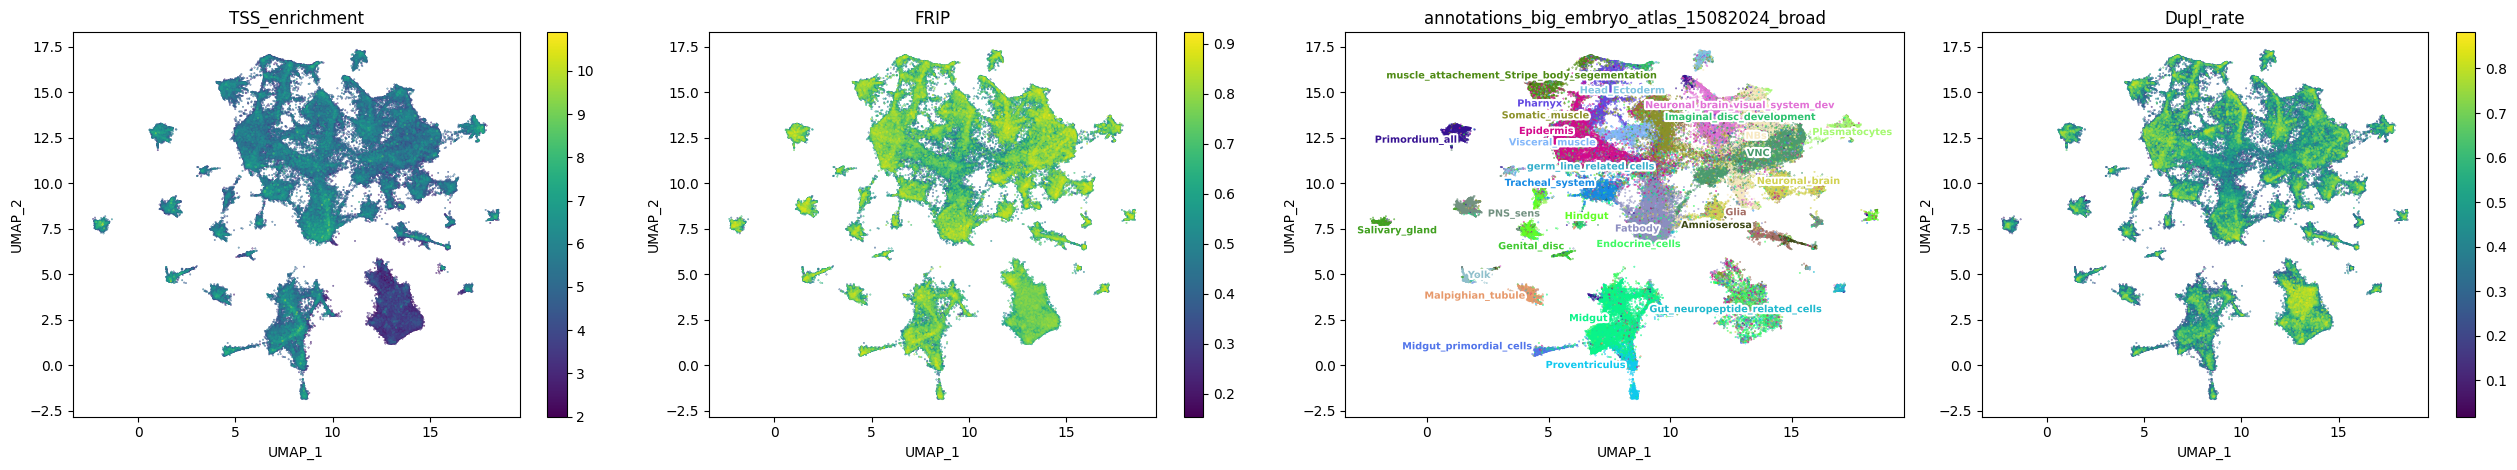

In [81]:
# model 190
plot_metadata(
    cistopic_obj,
    reduction_name='harmony_tech_details_UMAP',
    variables=['TSS_enrichment', 'FRIP', 'annotations_big_embryo_atlas_15082024_broad', 'Dupl_rate'],
    target='cell', num_columns=4,
    text_size=7,
    dot_size=0.1)

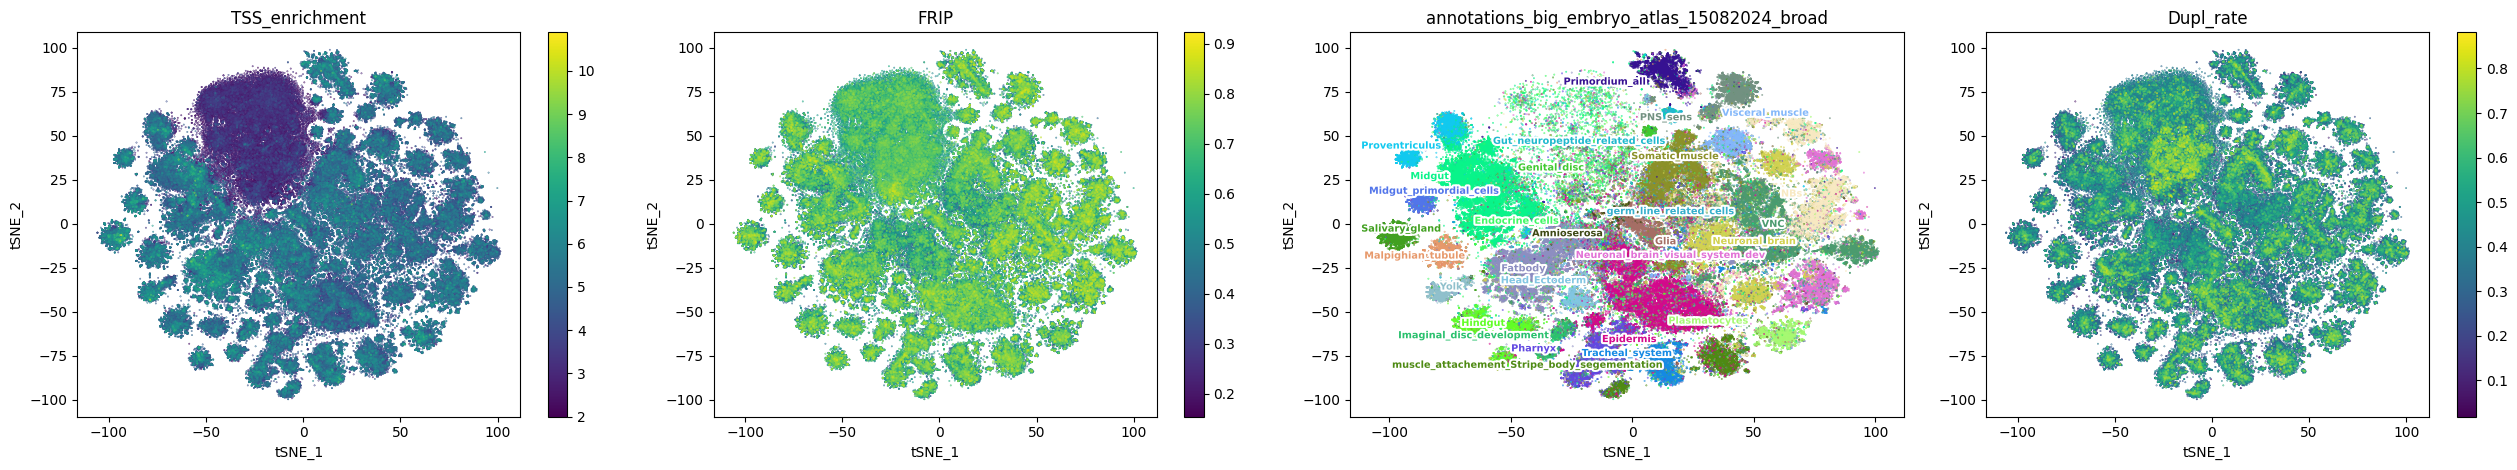

In [82]:
# model 190
plot_metadata(
    cistopic_obj,
    reduction_name='harmony_tech_details_tSNE',
    variables=['TSS_enrichment', 'FRIP', 'annotations_big_embryo_atlas_15082024_broad', 'Dupl_rate'],
    target='cell', num_columns=4,
    text_size=7,
    dot_size=0.1)

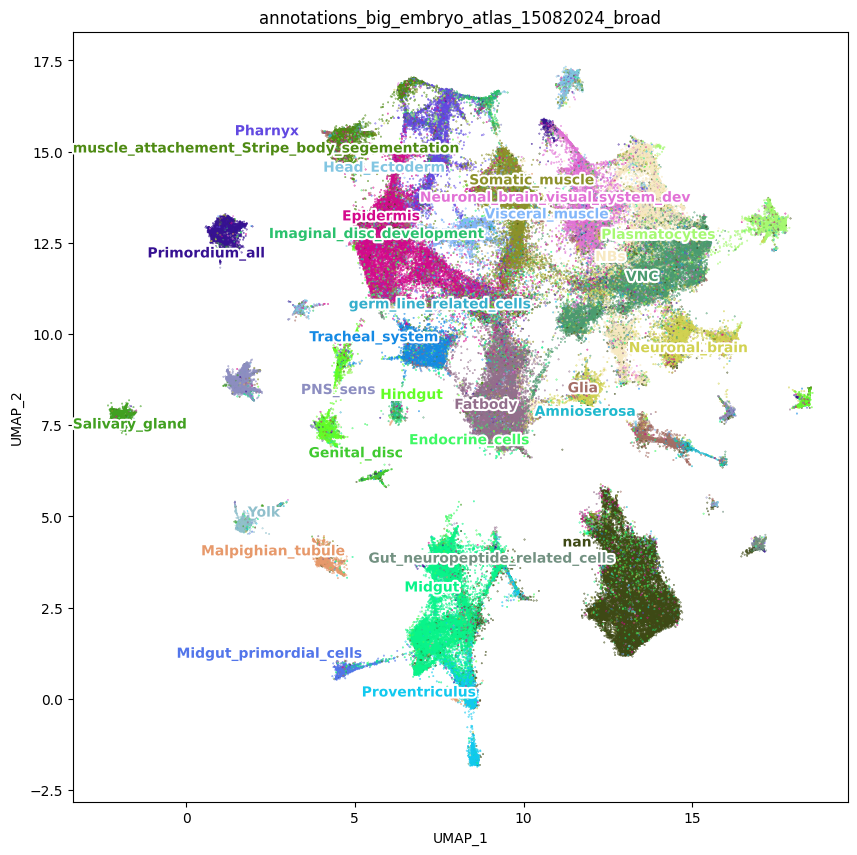

In [83]:
# model 120
plot_metadata(
    cistopic_obj,
    reduction_name='harmony_tech_details_UMAP',
    variables=['annotations_big_embryo_atlas_15082024_broad' ],
    remove_nan = False,
    target='cell', num_columns=1,
    figsize = (10,10),
    text_size=10,
    dot_size=0.1)

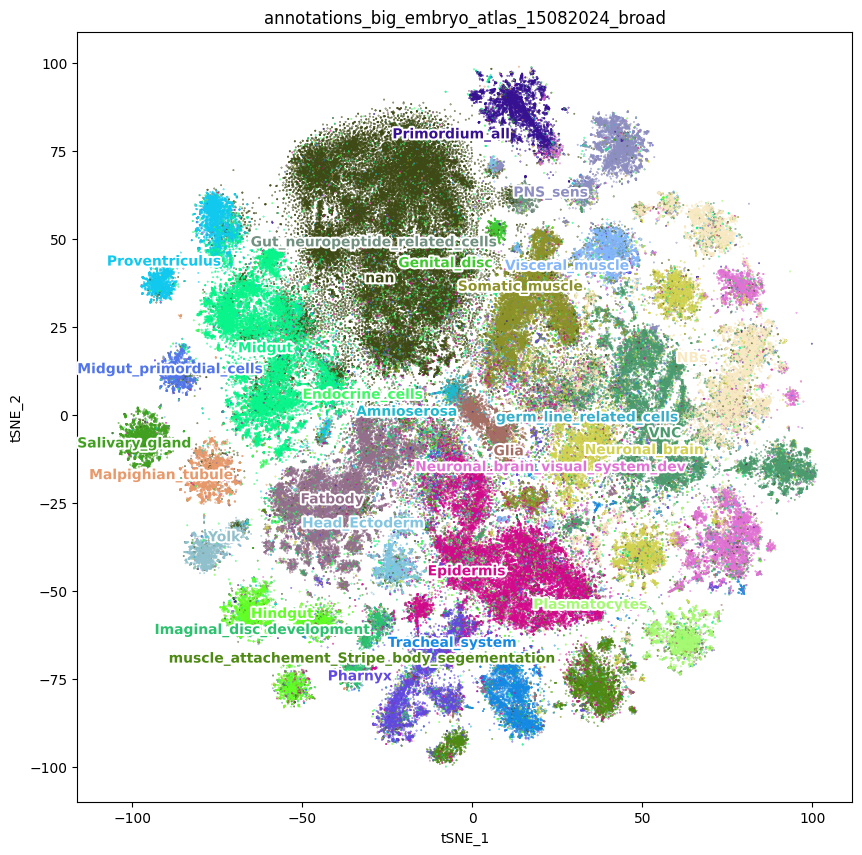

In [85]:
# model 120
plot_metadata(
    cistopic_obj,
    reduction_name='harmony_tech_details_tSNE',
    variables=['annotations_big_embryo_atlas_15082024_broad' ],
    remove_nan = False,
    target='cell', num_columns=1,
    figsize = (10,10),
    text_size=10,
    dot_size=0.1)